In [42]:
import os
import numpy as np
from PIL import Image

sample_data_dir = '/mnt/hdd1/c-MET_datasets/Lung_c-MET IHC_scored/sample'
samsung_data_dir = '/mnt/hdd1/c-MET_datasets/SLIDE_DATA/록원재단/AT2/C-MET_slide/patch/S-LC0001-MET/x200'

def get_img_list(data_dir):
    img_files = [i for i in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, i))]
    return sorted(img_files)

sample_data_list = get_img_list(sample_data_dir)
samsung_data_list = get_img_list(samsung_data_dir)

samsung_data_list = [data for data in samsung_data_list if int(data.split('_')[1]) < 50000]
samsung_data_list.sort()

In [44]:
def get_image(data_dir, data_list):
    imgs = []
    for file in data_list:
        imgs.append(np.array(Image.open(os.path.join(data_dir, file)).convert('RGB')))
    return imgs

sample_data = get_image(sample_data_dir, sample_data_list)
samsung_data = get_image(samsung_data_dir, samsung_data_list)

In [45]:
len(sample_data), len(samsung_data)

(20, 19)

In [46]:
sample_data[0].shape

(882, 1730, 3)

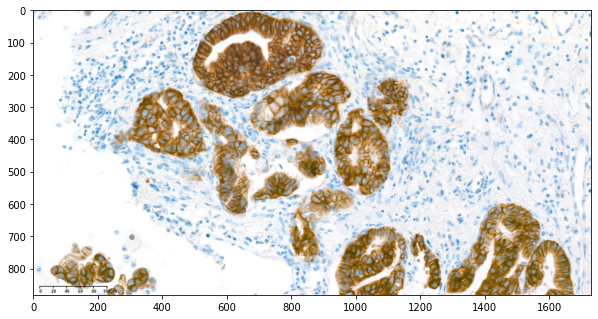

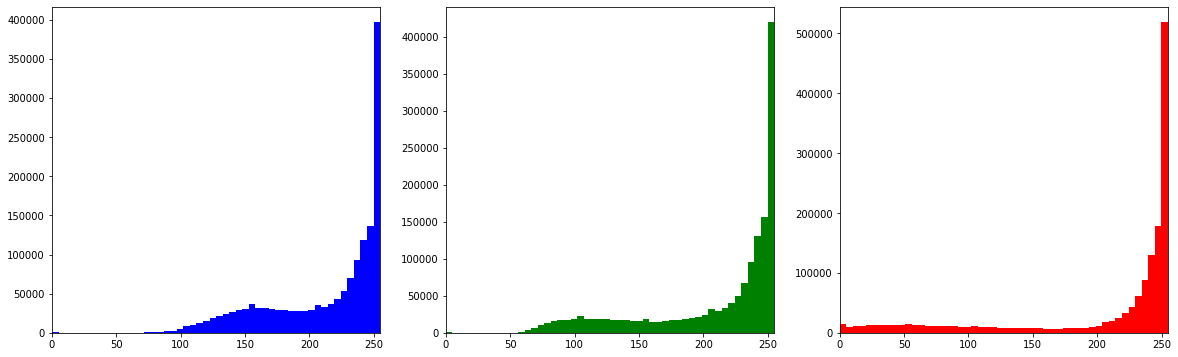

In [47]:
import matplotlib.pyplot as plt

i = 19

plt.figure(figsize=(10, 10))
plt.imshow(sample_data[i])
plt.show()

plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.hist(sample_data[i][:,:,0].flatten(), bins = 50, range = (0, 255), color= 'blue')
plt.xlim((0, 255))
plt.subplot(1, 3, 2)
plt.hist(sample_data[i][:,:,1].flatten(), bins = 50, range = (0, 255), color= 'green')
plt.xlim((0, 255))
plt.subplot(1, 3, 3)
plt.hist(sample_data[i][:,:,2].flatten(), bins = 50, range = (0, 255), color= 'red')
plt.xlim((0, 255))
plt.show()

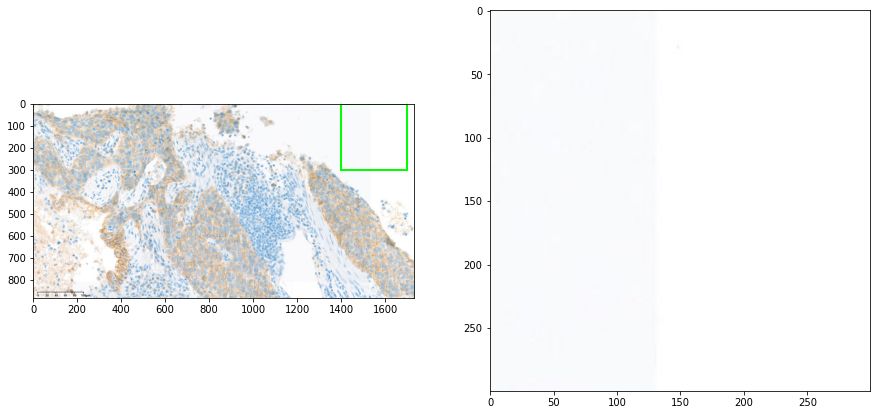

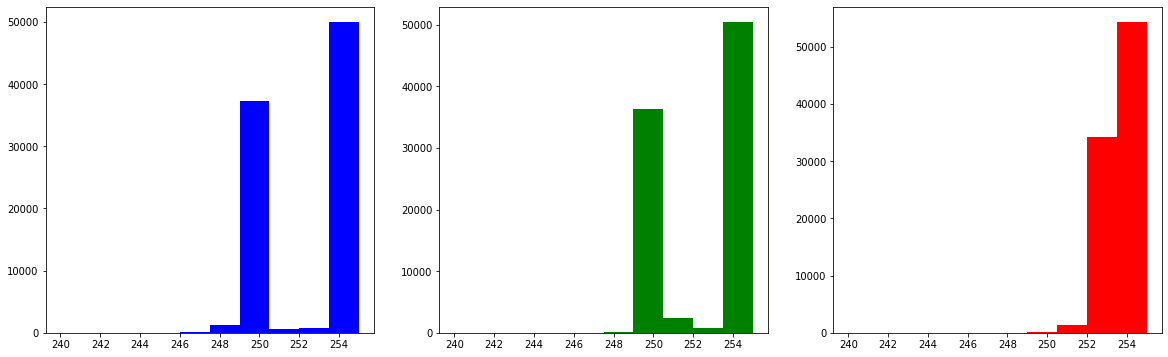

In [80]:
import matplotlib.patches as patches

i = 6

x, y = 1400, 0
x_step, y_step = 300, 300

plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.imshow(sample_data[i])

ax = plt.gca()
rect = patches.Rectangle((x, y), x_step, y_step, linewidth=2, edgecolor='lime', fill=False)
ax.add_patch(rect)

plt.subplot(1, 2, 2)
plt.imshow(sample_data[i][y:y+y_step, x:x+x_step, :])
plt.show()

plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.hist(sample_data[i][y:y+y_step, x:x+x_step,0].flatten(), range = (240, 255), color= 'blue')
# plt.xlim((0, 255))
plt.subplot(1, 3, 2)
plt.hist(sample_data[i][y:y+y_step, x:x+x_step,1].flatten(), range = (240, 255), color= 'green')
# plt.xlim((0, 255))
plt.subplot(1, 3, 3)
plt.hist(sample_data[i][y:y+y_step, x:x+x_step,2].flatten(), range = (240, 255), color= 'red')
# plt.xlim((0, 255))
plt.show()

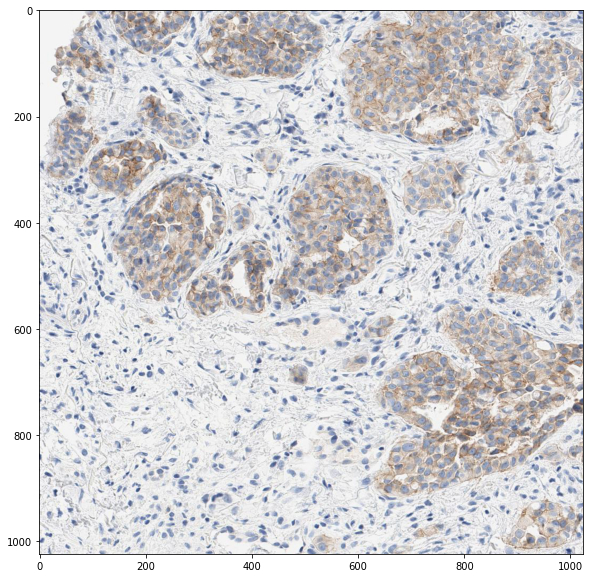

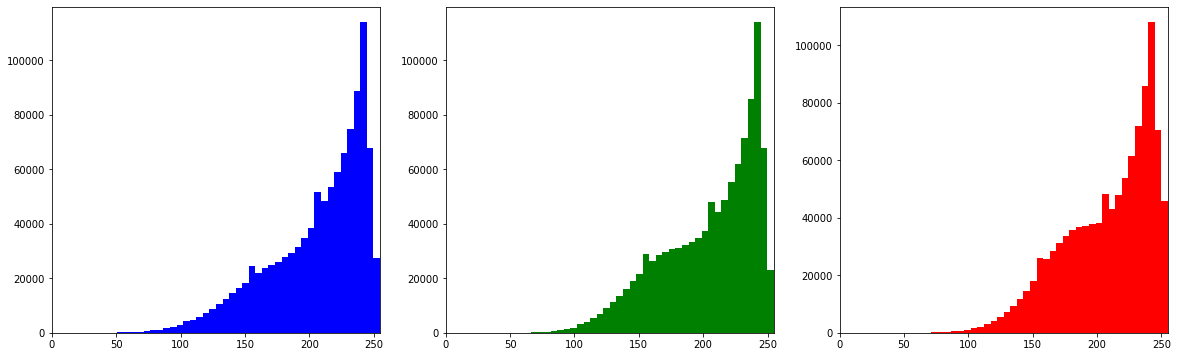

In [48]:
i = 3

plt.figure(figsize=(10, 10))
plt.imshow(samsung_data[i])
plt.show()

plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.hist(samsung_data[i][:,:,0].flatten(), bins = 50, range = (0, 255), color= 'blue')
plt.xlim((0, 255))
plt.subplot(1, 3, 2)
plt.hist(samsung_data[i][:,:,1].flatten(), bins = 50, range = (0, 255), color= 'green')
plt.xlim((0, 255))
plt.subplot(1, 3, 3)
plt.hist(samsung_data[i][:,:,2].flatten(), bins = 50, range = (0, 255), color= 'red')
plt.xlim((0, 255))
plt.show()

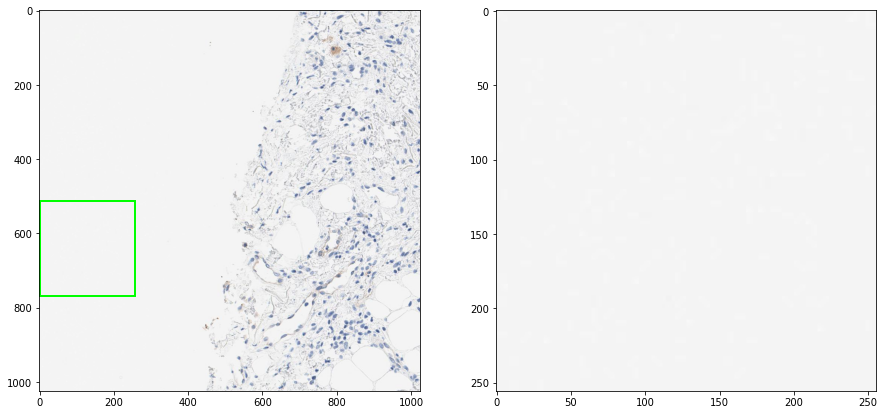

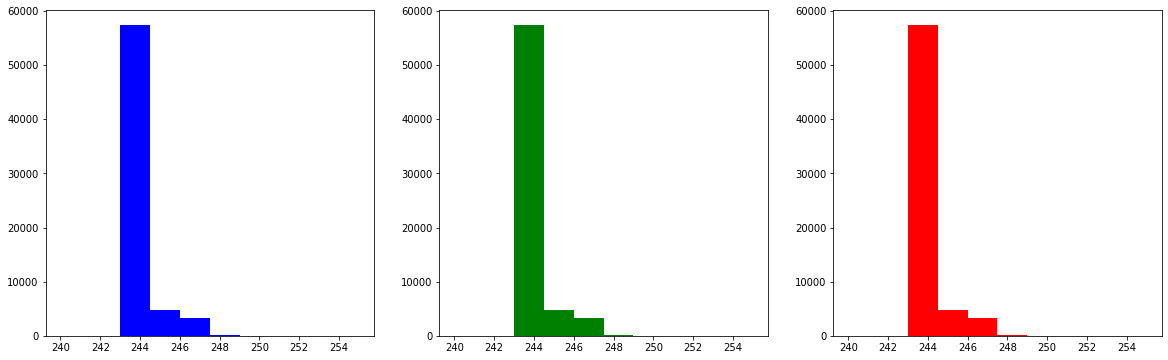

In [83]:
import matplotlib.patches as patches

i = 0

x, y = 0, 512
x_step, y_step = 256, 256

plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.imshow(samsung_data[i])

ax = plt.gca()
rect = patches.Rectangle((x, y), x_step, y_step, linewidth=2, edgecolor='lime', fill=False)
ax.add_patch(rect)

plt.subplot(1, 2, 2)
plt.imshow(samsung_data[i][y:y+y_step, x:x+x_step, :])
plt.show()

plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.hist(samsung_data[i][y:y+y_step, x:x+x_step,0].flatten(), range = (240, 255), color= 'blue')
# plt.xlim((200, 255))
plt.subplot(1, 3, 2)
plt.hist(samsung_data[i][y:y+y_step, x:x+x_step,1].flatten(), range = (240, 255), color= 'green')
# plt.xlim((200, 255))
plt.subplot(1, 3, 3)
plt.hist(samsung_data[i][y:y+y_step, x:x+x_step,2].flatten(), range = (240, 255), color= 'red')
# plt.xlim((200, 255))
plt.show()

# Save non-tissue area images

In [92]:
x_points = [0, 256, 512, 768]
y_points = [0, 256, 512, 768]

size = 256
data_dir = '/mnt/hdd1/c-MET_datasets/Lung_c-MET IHC_scored/DL-based_tumor_seg_dataset/non_tissue'
for filename, samsung_patch in zip(samsung_data_list, samsung_data):
    for i in x_points:
        for j in y_points:
            sample = samsung_patch[j:j+size, i:i+size, :]
            if np.mean(sample) > 243:
                    sample = Image.fromarray(sample).convert('RGB')
                    label = Image.fromarray(np.zeros((size, size))).convert('L')

                    sample.save(os.path.join(data_dir, f'{filename[:-4]}_{i}_{j}_sample.png'))
                    label.save(os.path.join(data_dir, f'{filename[:-4]}_{i}_{j}_label.png'))
    